<a href="https://colab.research.google.com/github/TissaMaria/6thSem-ML-Lab/blob/main/1BM22CS309_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Binary Logistic Regression
import pandas as pd
from matplotlib import pyplot as plt
from seaborn import regplot
import seaborn as sns


In [ ]:
df1=pd.read_csv('HR_comma_sep.csv')
df1.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
5699,0.92,0.53,3,253,3,0,0,0,support,low
8471,0.65,0.92,4,242,2,0,0,0,RandD,medium
1213,0.38,0.55,2,134,3,0,1,0,IT,low
13958,0.48,0.70,3,213,10,0,0,0,sales,medium
14941,0.43,0.49,2,131,3,0,1,0,RandD,high
10682,0.18,0.54,4,145,5,0,0,0,RandD,low
1115,0.42,0.46,2,131,3,0,1,0,support,medium
7814,0.18,0.99,4,160,5,0,0,0,accounting,low
6365,0.63,0.72,2,161,5,0,0,0,hr,medium
2111,1.00,0.92,5,161,3,1,0,0,support,low


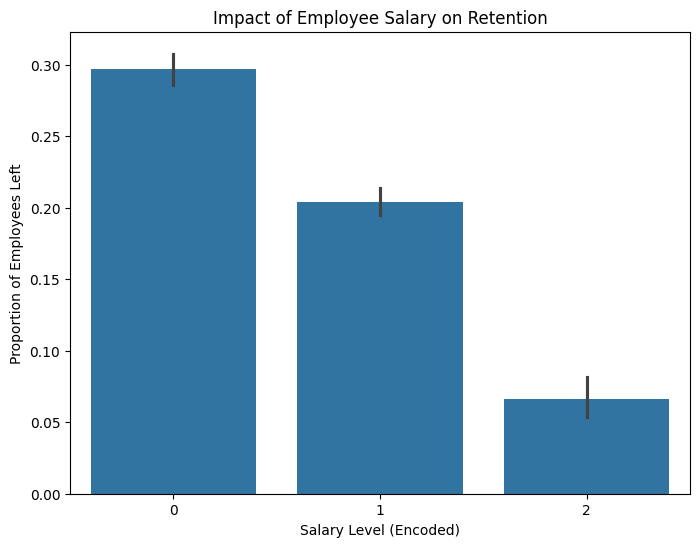

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='salary_encoded', y='left', data=df1)
plt.title('Impact of Employee Salary on Retention')
plt.xlabel('Salary Level (Encoded)')
plt.ylabel('Proportion of Employees Left')
plt.show()


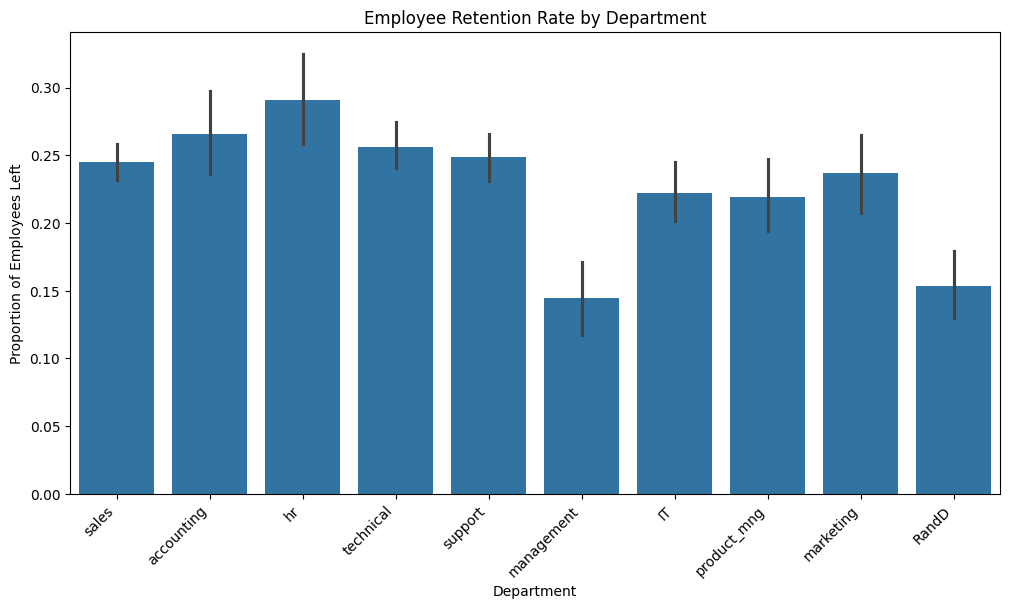

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='left', data=df1)
plt.title('Employee Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import numpy as np
import seaborn as sns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
department_encoded = ohe.fit_transform(df1[['Department']])
department_encoded_df = pd.DataFrame(department_encoded, columns=ohe.get_feature_names_out(['Department']))
df1 = pd.concat([df1, department_encoded_df], axis=1)
df1 = df1.drop('Department', axis=1)
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']], dtype=np.int64)
salary_encoded = ordinal_encoder.fit_transform(df1[['salary']])
df1['salary_encoded'] = salary_encoded
df1 = df1.drop('salary', axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


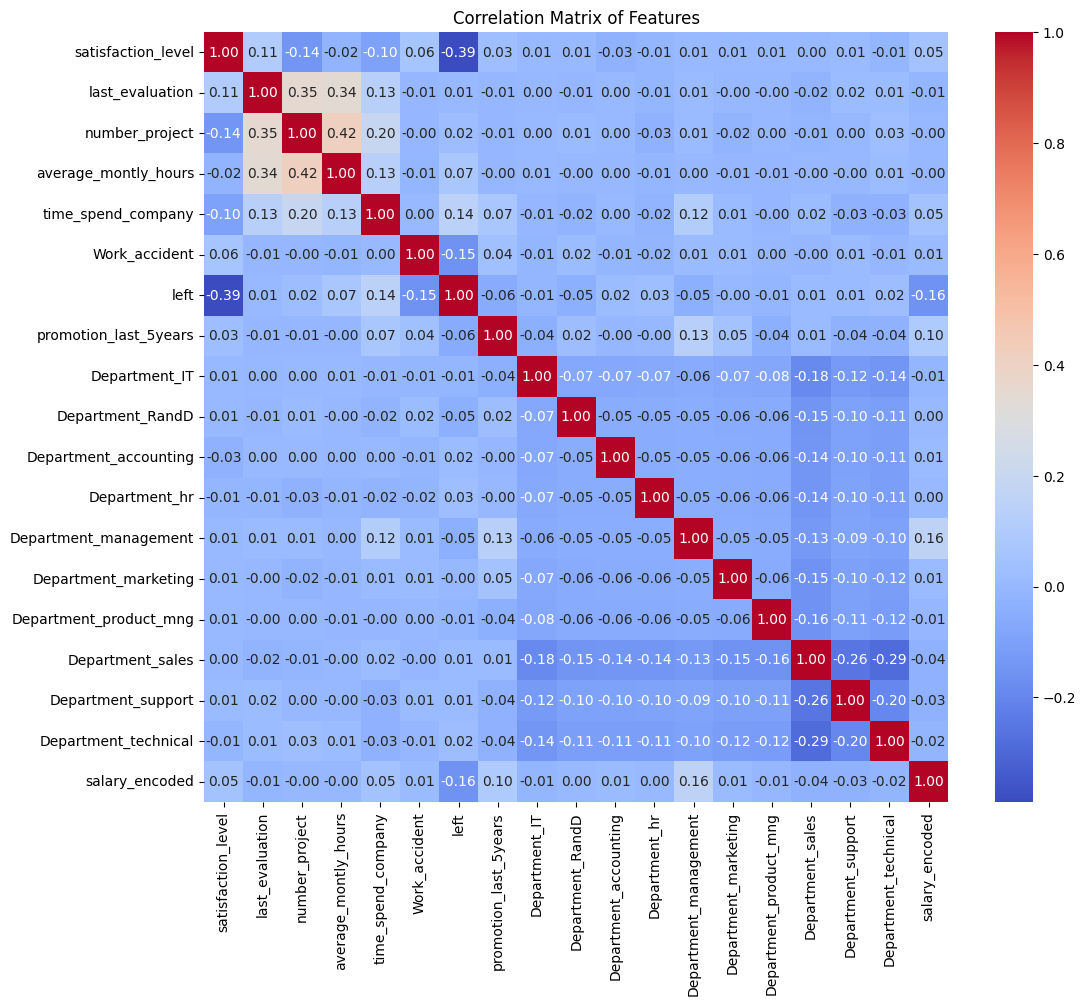

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:

correlation_threshold = 0.1
correlated_features = correlation_matrix['left'].abs() > correlation_threshold
highly_correlated_features = correlated_features[correlated_features].index.tolist()

new_df = df1[highly_correlated_features]

print(new_df.head())


   satisfaction_level  time_spend_company  Work_accident  left  salary_encoded
0                0.38                   3              0     1               0
1                0.80                   6              0     1               1
2                0.11                   4              0     1               1
3                0.72                   5              0     1               0
4                0.37                   3              0     1               0


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = new_df.drop('left', axis=1)
y = new_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

example_data = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(example_data)



Accuracy: 0.761


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

zoo_data = pd.read_csv('zoo-data.csv')
zoo_class = pd.read_csv('zoo-class-type.csv')


merged_data = pd.merge(zoo_data, zoo_class, left_on='class_type', right_on='Class_Number')

merged_data = merged_data.drop(['Animal_Names', 'Number_Of_Animal_Species_In_Class', 'Class_Number','class_type','animal_name'], axis=1)


X = merged_data.drop('Class_Type', axis=1)
y = merged_data['Class_Type']
print(merged_data.head())



   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize Class_Type  
0         1         0     0     4     0         0        1     Mammal  
1         1         0     0     4     1         0        1     Mammal  
2         0         0     1     0     1         0        0       Fish  
3         1         0     0     4     0         0        1     Mammal  
4         1         0     0     4     1         0        1     Mammal  


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9523809523809523


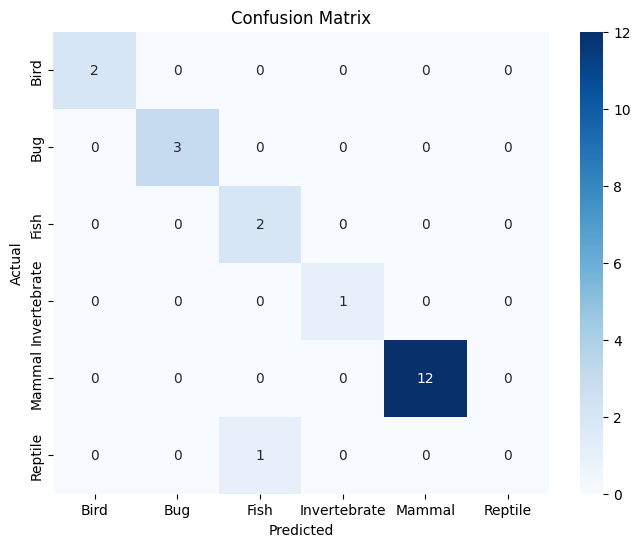

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
